## Seoul Bike Sharing Demand Data Set
 The dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather data and Holidays information.

- Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = cols

In [3]:
df["functional"] = (df["functional"] == 'Yes').astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis = 1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


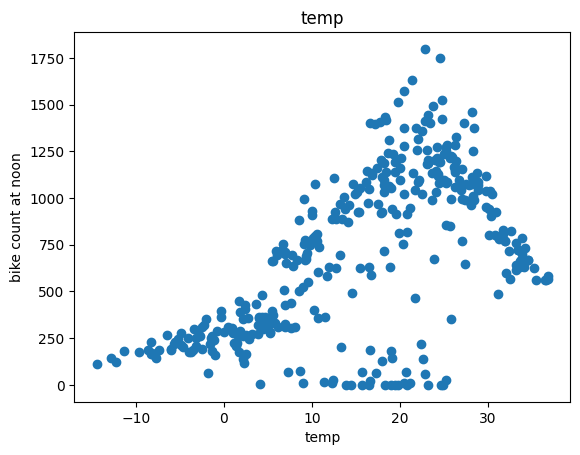

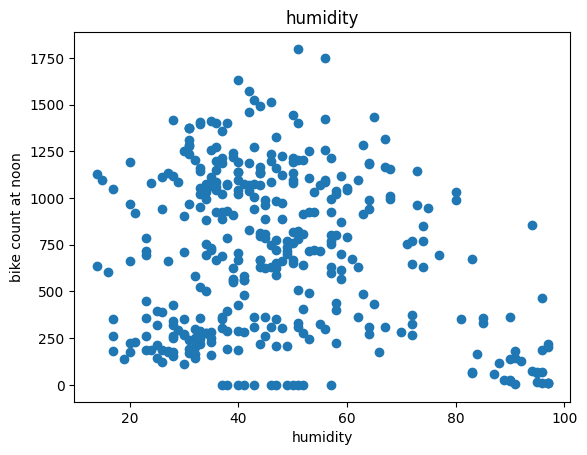

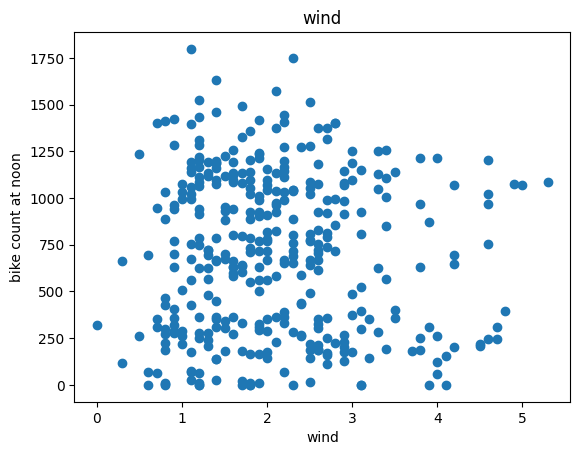

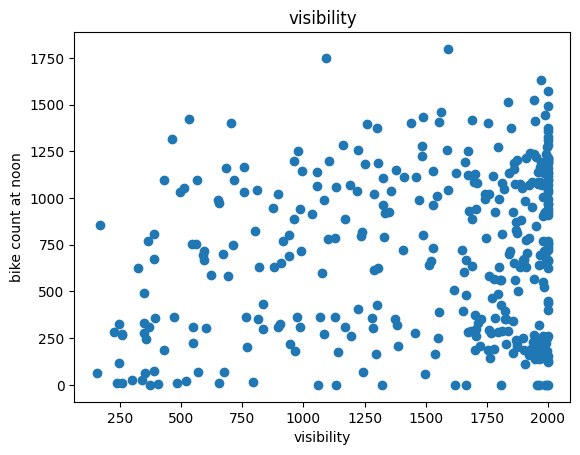

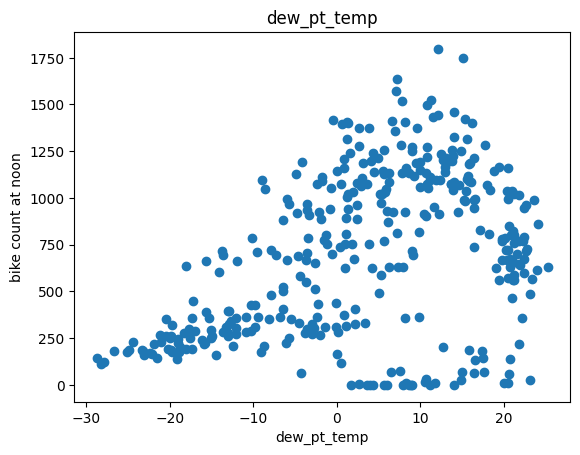

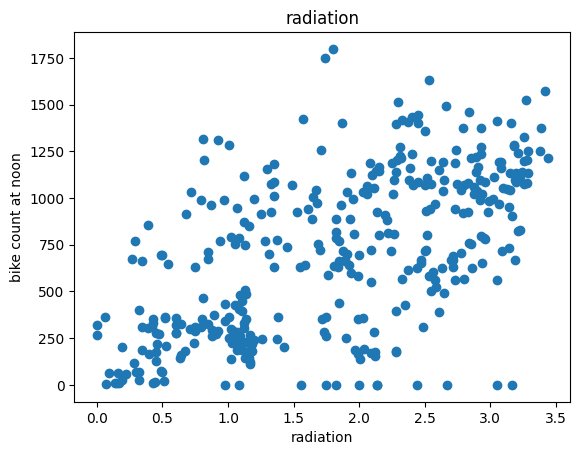

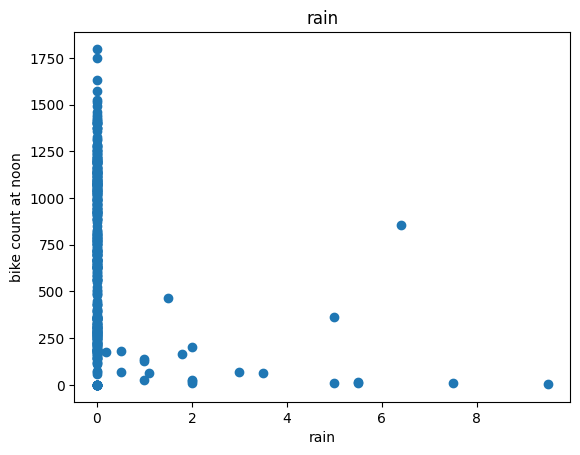

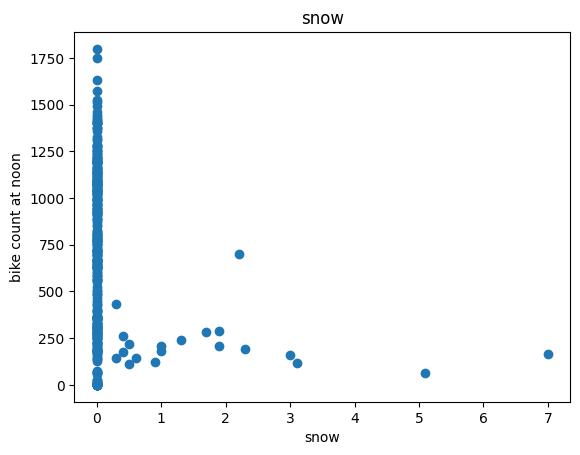

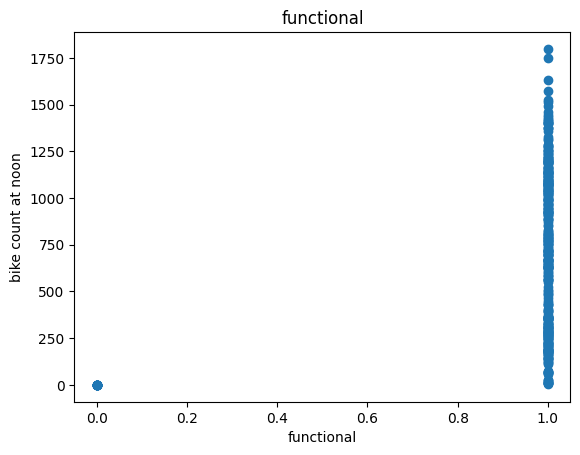

In [4]:
for i in df.columns[1:]:
  plt.scatter(df[i], df['bike_count'])
  plt.title(i)
  plt.ylabel("bike count at noon")
  plt.xlabel(i)
  plt.show()

In [5]:
df = df.drop(['wind', 'visibility', 'functional'], axis = 1)

## Train, Valid, Test dataset

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def get_xy(dataframe, y_label, x_label=None):
  dataframe = copy.deepcopy(dataframe)
  if x_label is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_label) == 1:
      X = dataframe[x_label[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_label].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X, y))

  return data, X, y

## Simple Linear Regression

In [8]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_label=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_label=['temp'])
_, X_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_label=['temp'])

In [9]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [10]:
temp_reg.score(X_test_temp, y_test_temp)

0.3241451300159408

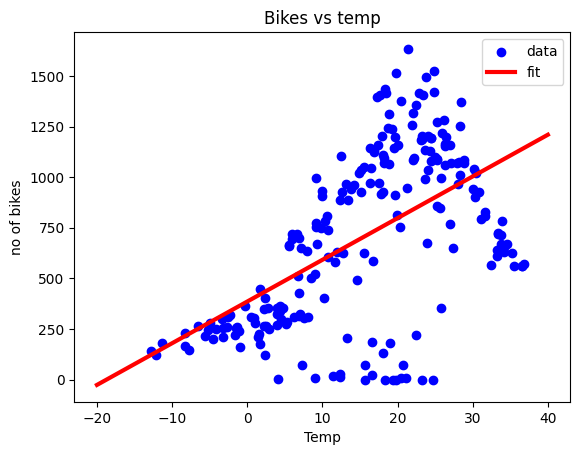

In [11]:
plt.scatter(X_train_temp, y_train_temp, label="data", color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes vs temp')
plt.ylabel('no of bikes')
plt.xlabel('Temp')
plt.show()

## Multiple Linear Regression

In [12]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_label=df.columns[1:])
_, X_val_all, y_val_all = get_xy(valid, "bike_count", x_label=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_label=df.columns[1:])

In [13]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [14]:
all_reg.score(X_test_all, y_test_all)

0.4439646995204851

## Regression with Neural Net (Single node)

In [15]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [16]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [17]:
temp_nn_model = tf.keras.Sequential([
  temp_normalizer, tf.keras.layers.Dense(1)
])

In [18]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [19]:
history = temp_nn_model.fit(X_train_temp.reshape(-1), y_train_temp, verbose=0, epochs=1000, validation_data=(X_valid_temp, y_valid_temp))

In [20]:
plot_loss(history)

In [21]:
plt.scatter(X_train_temp, y_train_temp, label="data", color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label='fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes vs temp')
plt.ylabel('no of bikes')
plt.xlabel('Temp')
plt.show()

In [22]:
all_normalizer = tf.keras.layers.Normalization()
all_normalizer.adapt(X_train_all)  ## multiple 

In [23]:
all_nn_model = tf.keras.Sequential([
  all_normalizer, tf.keras.layers.Dense(1)
])

In [24]:
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [25]:
all_history = all_nn_model.fit(X_train_all, y_train_all, verbose=0, epochs=1000, validation_data=(X_val_all, y_val_all))

In [26]:
plot_loss(all_history)

NameError: name 'all_history' is not defined

## Nural Net

In [27]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

temp_nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])

temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [28]:
history = temp_nn_model.fit(
    X_train_temp, y_train_temp, 
    verbose=0, epochs=100, 
    validation_data=(X_valid_temp, y_valid_temp)
  )

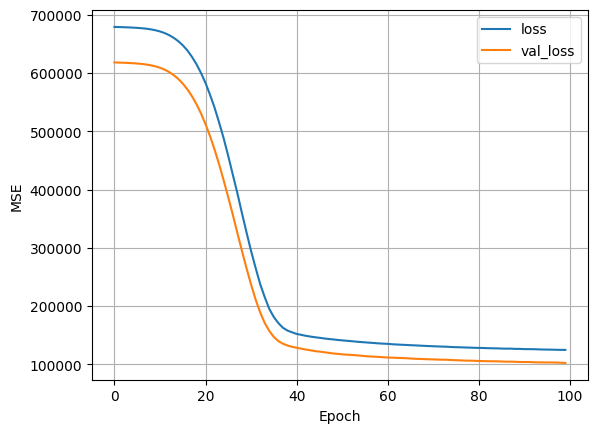

In [29]:
plot_loss(history)

4/4 [==============================] - 1s 5ms/step


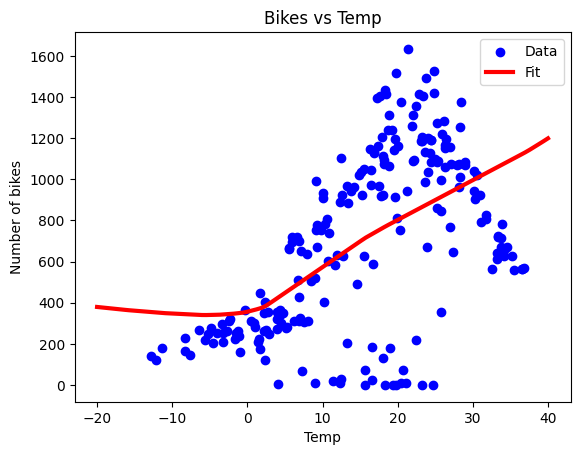

In [31]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [36]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [37]:
all_nn_model = tf.keras.Sequential([
  all_normalizer,
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])

all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [39]:
history = all_nn_model.fit(
    X_train_all, y_train_all, 
    verbose=0, epochs=100, 
    validation_data=(X_val_all, y_val_all)
  )

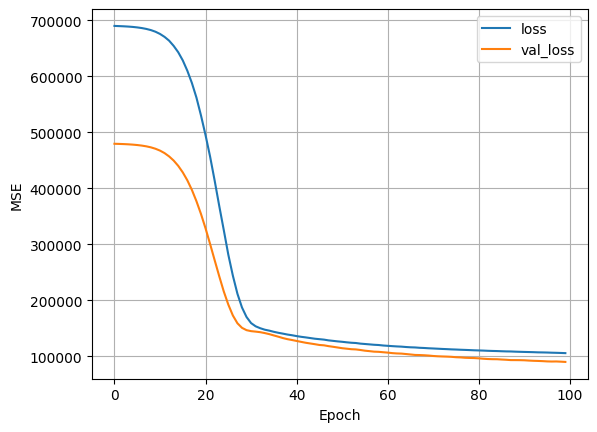

In [40]:
plot_loss(history)

In [41]:
# MSE of linear regresser
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = all_nn_model.predict(X_test_all)

3/3 [==============================] - 0s 8ms/step


In [42]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [43]:
MSE(y_pred_lr, y_test_all)


97859.68531841248

In [44]:
MSE(y_pred_nn, y_test_all)

102561.47248942957

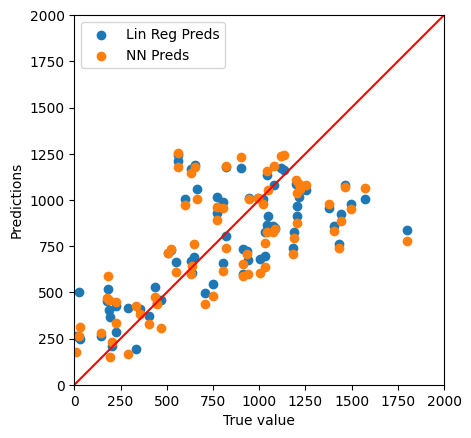

In [48]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel('True value')
plt.ylabel('Predictions')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
plt.plot(lims, lims, c='red')